<a href="https://colab.research.google.com/github/MatheusFVieira/Curso_DataScience/blob/main/Curso2_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

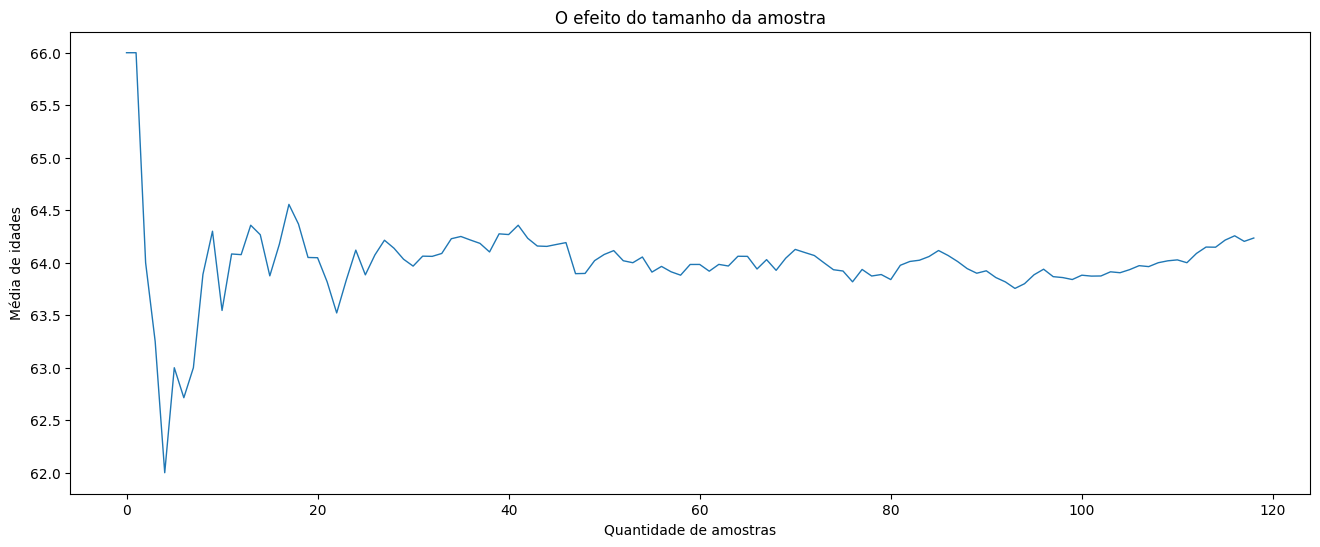

In [ ]:
# Coletar a média para cada tamanho de amostra
medias = [dados_idade_aposentadoria[0:i]['idade'].mean() for i in range(1, 120)]

# Plotar a linha
plt.figure(figsize=(16,6))
plt.title('O efeito do tamanho da amostra')
plt.xlabel('Quantidade de amostras')
plt.ylabel('Média de idades')
plt.plot(medias, linewidth=1)

In [ ]:
# Reamostragens

# tamanho da amostra

n = 100

# quantidade de amostras

qnt = 10000

# função de reamostragem e cálculo de médias

def reamostragem_medias(dados, coluna, n, qnt):
  medias = [dados[coluna].sample(n, replace=True).mean()for _ in range(qnt)]
  return medias

In [ ]:
medias_idade = reamostragem_medias(dados_idade_aposentadoria, "idade", n, qnt)

In [ ]:
medias_duracao = reamostragem_medias(dados_vida_lampada, "duracao", n, qnt)

In [ ]:
medias_altura = reamostragem_medias(dados_alturas, "alturas", n, qnt)

In [ ]:
print("*****  Médias populacionais *****")

print("idade:", dados_idade_aposentadoria['idade'].mean())
print("duração:", dados_vida_lampada['duracao'].mean())
print("altura:", dados_alturas['alturas'].mean())

*****  Médias populacionais *****
idade: 62.70857142857143
duração: 1731.8036029420002
altura: 169.52022


In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

print("*****  Médias pamostrais *****")

print("idade:", Average(medias_idade))
print("duração:", Average(medias_duracao))
print("altura:", Average(medias_altura))

*****  Médias pamostrais *****
idade: 62.694979000000096
duração: 1733.5265479558493
altura: 169.5063819000001


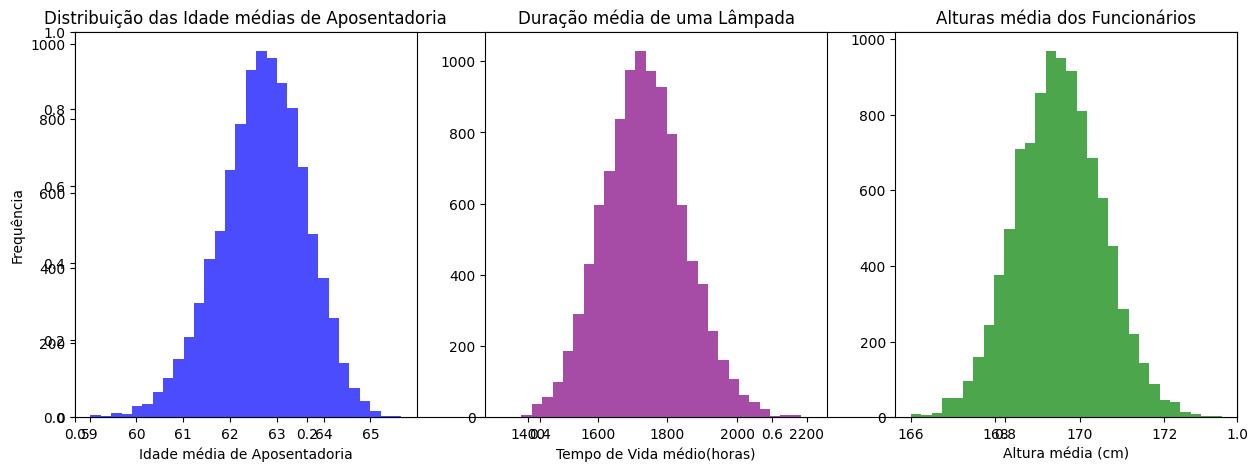

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(medias_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(medias_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

In [ ]:
# média da nova amostra
media_nova_amostra = 1200

In [ ]:
# media original
media_populacional = dados_vida_lampada['duracao'].mean()

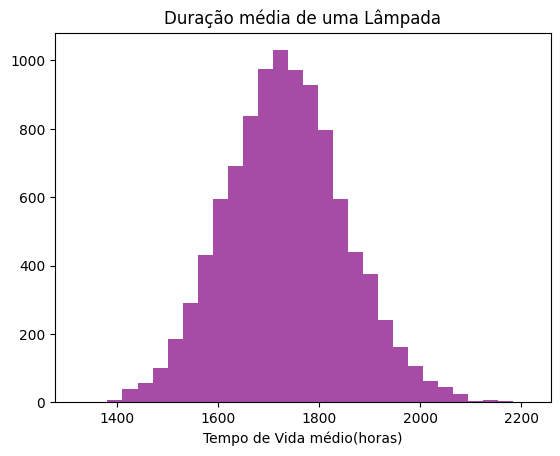

In [ ]:
# Quão distante essa média está do comportamento?

plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [ ]:
# transformando medias_duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': medias_duracao})

In [ ]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1733.5265479558473
Erro Padrão: 118.86660118376153


In [ ]:
# Quantos erros?
1732 - 3*EP

1375.4001964487154

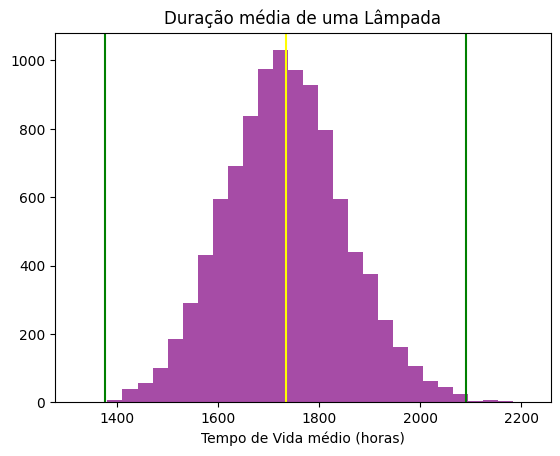

In [ ]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio (horas)')
plt.axvline(media_das_medias, color = "yellow")
plt.axvline(media_das_medias + 3*EP , color = "green")
plt.axvline(media_das_medias - 3*EP , color = "green")
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [ ]:
#quanto está no intervalo de +ou- dois desvio
qnt_obs = duracao_amostras[(duracao_amostras > media_das_medias - 3*EP) &
                          (duracao_amostras < media_das_medias + 3*EP)]

In [ ]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()*100

,0
medias_duracao,99.78


In [ ]:
from scipy import stats

In [ ]:
# levar em consideração essa amostra
dados_vida_lampada

# nível de confiança definido
confianca = 0.95

In [ ]:
#informações para o IC

media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostral = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [ ]:
intervalo_confianca = stats.norm.interval(confianca)

In [ ]:
# Calculando intervalo de confiança

intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao_amostral/np.sqrt(tamanho_amostra))

In [ ]:
# Visualizando os resultados

print("IC (95%):", intervalo_confianca)

IC (95%): (np.float64(1658.3741665835485), np.float64(1805.233039300452))
